In [1]:
# Force the local gqcpy to be imported
import sys
sys.path.insert(0, '../../build/gqcpy')

import gqcpy

# Import numpy
import numpy as np

# ONV path manipulation

An ONV, or occupation number vector, is a crucial element in Full CI calculations. In this example notebook we will show you how you can use gqcpy to create and manipulate ONV paths. 

## The ONV basis

In this example we will work with a spin unresolved ONV basis, meaning that there is no distinction between alpha and beta electrons.

In [2]:
# Create an ONV basis of 3 electrons and 5 possible orbitals
onv_basis = gqcpy.SpinUnresolvedONVBasis(5, 3)

The ONV Basis itself has some useful functions we can call.

In [3]:
# Get the weight of the arc starting at coordinate (p, n)
onv_basis.arcWeight(0,0)

0

In [4]:
# Get the weight of the vertex at coordinate (p, n)
onv_basis.vertexWeight(3, 2)

3

In [5]:
# Get the dimension of the ONV basis
onv_basis.calculateDimension(5, 3)

10

## A specific ONV and its path

We can create an ONV and it's path in two differenbt ways.

In [6]:
# Create an ONV
# The indices determine where the occupied orbitals should be: "1" in the bitstring
onv = gqcpy.SpinUnresolvedONV.FromOccupiedIndices([0, 2, 3], 5)

# from string is read right to left
onv_2 = gqcpy.SpinUnresolvedONV.FromString("01101")

In [7]:
# Create the ONV path
ONV_path = gqcpy.ONVPath(onv_basis, onv)
ONV_path_2 = gqcpy.ONVPath(onv_basis, onv_2)

Both of these commands create the exact same ONV and path. From here on out, we will continue with the one named `onv`. The ONV created looks as follows:
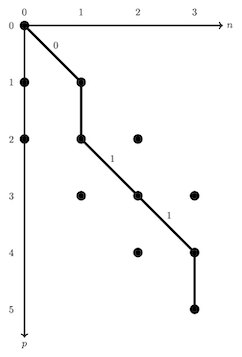

We can get the address of this ONV very easily. The ONV drawn here should have address 2.

In [8]:
ONV_path.address()

2

## One electron excitations

We can perform certain actions on these ONV's as well. Let's do this step-by-step. 
The first step is to annihilate the electron on occupied index 0. This means we will annihilate the arc starting at the point (0, 0)

In [9]:
ONV_path.annihilate(0, 0)

Our new ONV looks like this:
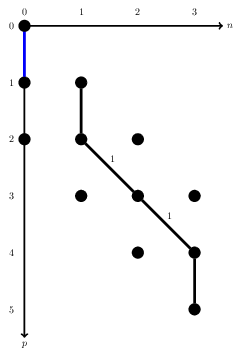

The weight of this arc was zero: our address should still be 2.

In [10]:
ONV_path.address()

2

We will now look for the next index where we can create a new electron. We only look at the NEXT one, to make sure we don't create the electron we just removed.

In [11]:
ONV_path.nextCreationIndex()

1

Since the next index is 1, we can create a new arc starting from (1, 0).

In [12]:
ONV_path.create(1, 0)

Our new ONV looks like this:
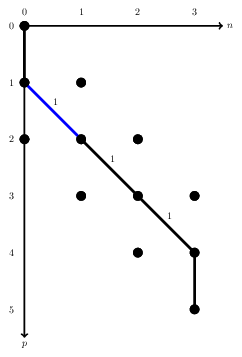

The address of this ONV should be 3.

In [13]:
ONV_path.address()

3

There is another option to create an electron however. To study this other option, we will first unde our latest creation operator. Let's also check the address to be sure. We should be back to 2.

In [14]:
ONV_path.annihilate(1, 0)

In [15]:
ONV_path.address()

2

After annihilating this electron, we can freely shif the vertical arc (representing the unoccupied orbital) to the left. This leads to:
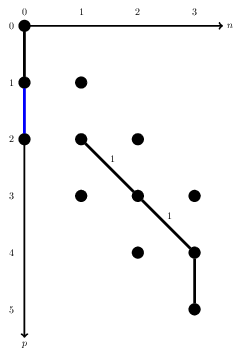

Let's once again check the next possible creation index.

In [16]:
ONV_path.nextCreationIndex()

2

This gives raise to a problem. As you can see in the figure, index 2 is a occupied orbital. This means we can't create an electron there. Luckily there is a solution for this. We can simply shift the diagonal arc to the left.

In [17]:
ONV_path.leftTranslate(2, 1)

Because of the fermionic anti-commutation relation, the sign of the ONV flips each time an occupied orbital is encountered. It should now be -1. The address should be 3, as can be seen from the figure:
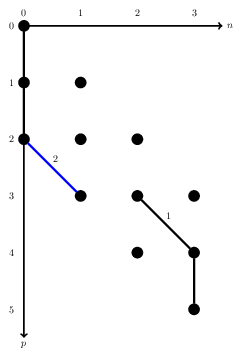

In [18]:
ONV_path.address()

3

In [19]:
ONV_path.sign()

-1

We can now repeat the previous process.

In [20]:
ONV_path.nextCreationIndex()

3

In [21]:
ONV_path.leftTranslate(3, 2)

This should lead to this ONV, with now sign 1 and address 5.
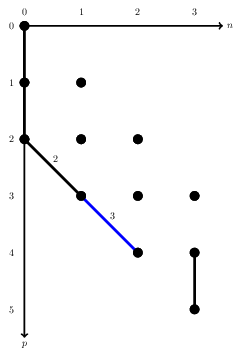

In [22]:
ONV_path.address()

5

In [23]:
ONV_path.sign()

1

Repeat the process again.

In [24]:
ONV_path.nextCreationIndex()

4

The problem from the previous 2 iterations is no longer present, as index 4 contains an unoccupied orbital. We can thus simply create an electron.

In [25]:
ONV_path.create(4, 2)

This leaves us with an ONV which should still have sign 1 and will now have address 9.
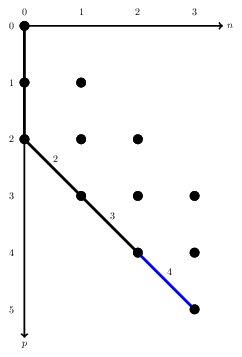

In [26]:
ONV_path.address()

9

In [27]:
ONV_path.sign()

1

## A slightly automated procedure

We can simplify this procedure however. Let's start by making a new ONV path.

In [28]:
new_ONV_path = gqcpy.ONVPath(onv_basis, onv)

The first steps are identical as before.

In [29]:
new_ONV_path.annihilate(0, 0)
new_ONV_path.create(1, 0)
new_ONV_path.annihilate(1,0)

In [30]:
new_ONV_path.address()

2

This leaves us with
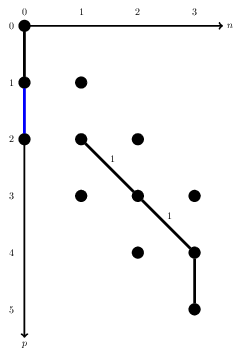

Now, let's automate the procedure of shifting towards the next unoccupied orbital. Up until our current position in the path, we have encountered 0 electrons, so that's what we tell the function.

In [31]:
new_ONV_path.shiftUntilNextUnoccupiedOrbital(0)

In [32]:
new_ONV_path.address()

5

In [33]:
new_ONV_path.sign()

1

The ONV with address 5 and sign 1 is exactly what we found previously:
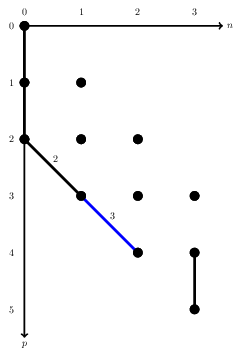

Thi means that creating at the current orbital, will result in the final ONV (address 9, sign 1).

In [34]:
new_ONV_path.create(4, 2)

In [35]:
new_ONV_path.address()

9

In [36]:
new_ONV_path.sign()

1

Or visually:
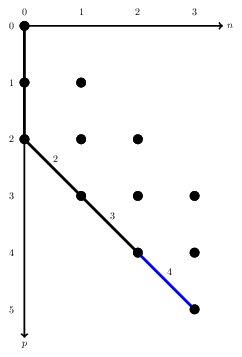